# Data Preperation

## Part A: Dataset Curation and Exploration
Dataset Sampling: From the full Mapillary dataset, create a focused subset:
- Identify the 20-30 most frequent traffic sign classes
- Extract 10,000-15,000 images containing these signs
- Ensure balanced class distribution (or document imbalance strategy)
- Split data: 70% training, 15% validation, 15% test

Exploratory Analysis:
= Analyze class distributions and sign size variations
- Visualize sample images showing different conditions (weather, lighting, occlusion)
- Document challenges: scale variation, multiple signs per image, background complexity
- Examine bounding box annotations and prepare ground truth data

Deliverable: Dataset preparation script and exploratory analysis notebook with visualizations.

## Part B: Preprocessing Pipeline
Color Space Analysis: Convert images to RGB, HSV, and Lab color spaces. Analyze which color space best isolates traffic signs from complex urban backgrounds (sky, buildings, vegetation).

Image Enhancement:
- Implement adaptive histogram equalization (CLAHE) for lighting normalization
- Apply bilateral filtering for noise reduction while preserving edges
- Test preprocessing on challenging images (nighttime, shadows, rain)
- Sign Region Extraction: Use bounding box annotations to extract sign regions. Implement padding strategy to include context around signs.
- 
Standardization: Resize extracted signs to uniform dimensions (e.g., 64x64 or 128x128 pixels) while maintaining aspect ratio considerations.
Deliverable: Preprocessing pipeline that outputs enhanced, standardized sign images.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import cv2
import matplotlib.pyplot as plt
from helper import (
    imshow,
    load_and_scale
)

In [4]:
DATAPATH = "/data/project/MSA8395/mapillary_traffic_sign_dataset/"

In [5]:
! ls {DATAPATH}/images | head 

_-0aygxELCt_AvFtXT-iOA.jpg
_0HZxhUtqtciRtnngKpxmQ.jpg
_0kfEqHYb79-bAe5dqVntA.jpg
_0KGgU1JTIZ880293UXfYw.jpg
_0nlCpNx8Yg5AyyK0hKRfA.jpg
_0pk6n0RVFOBYPJM71UiMQ.jpg
_0X1c5CcPmwT2uiaoK8B4Q.jpg
_0xW58Ud9Hd3rD3BHKdPmg.jpg
_11AtPZo5tz3rgDEtduDOA.jpg
_1Ey38i65Dc3grfYOTqNaA.jpg
ls: write error: Broken pipe


In [6]:
img = cv2.imread(f"{DATAPATH}/images/_-0aygxELCt_AvFtXT-iOA.jpg")

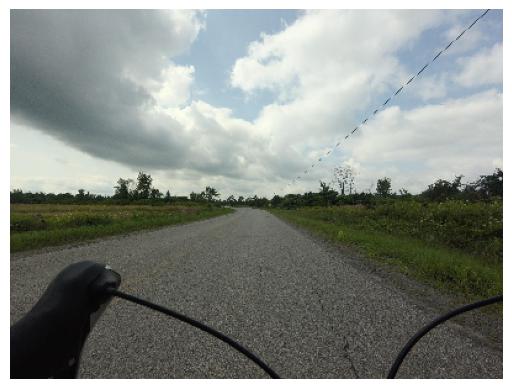

In [7]:
# use custom function from helper.py
imshow(img)

In [8]:
img.shape

(3000, 4000, 3)

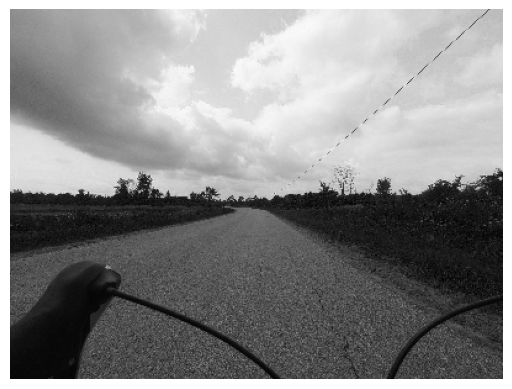

In [10]:
imshow(img[:,:,0])

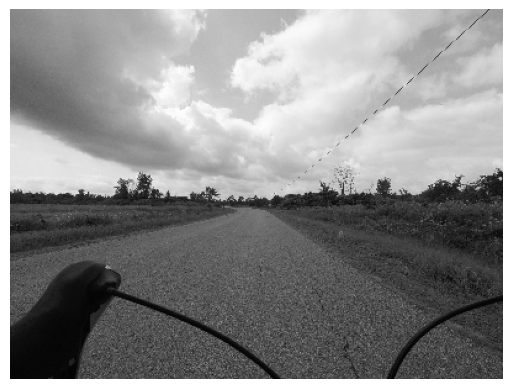

In [13]:
imshow(img[:,:,1]);

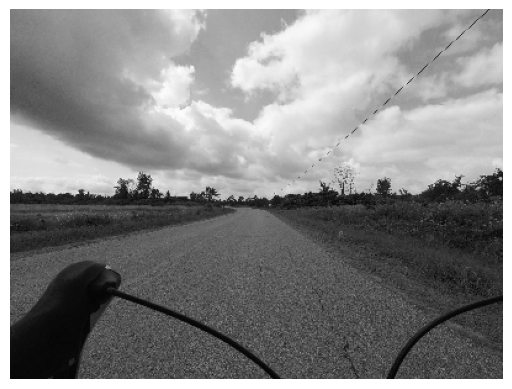

In [14]:
imshow(img[:,:,2]);

In [ ]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_image = cv2.resize(rgb_image, (400, 300))
plt.imshow(rgb_image);


In [ ]:
print(cv2.COLOR_BGR2RGB)

In [ ]:
from helper import load_and_scale

In [ ]:
img = load_and_scale(f"{DATAPATH}/images/_0kfEqHYb79-bAe5dqVntA.jpg")
plt.imshow(img);

In [ ]:
data = json.load(open(f"{DATAPATH}/mtsd_v2_fully_annotated/annotations/00CPBbi50rnROtcdEFVpwA.json"))
data

# Look at Annotation

In [ ]:

files = os.listdir(f"{DATAPATH}/mtsd_v2_fully_annotated/annotations/")
files[:10]

In [ ]:
import pandas as pd

In [ ]:
f = files[0]


def load_annotations(file_path: str, save: bool = True) -> pd.DataFrame:
    csv_file = f"{os.path.basename(file_path)}.csv"
    if os.path.isfile(csv_file):
    files = os.listdir(f"{file_path}/annotations/")
    
    annotations_list = []
    for f in files:
        annotation_data = json.load(open(f"{DATAPATH}/mtsd_v2_fully_annotated/annotations/{f}", "r", encoding='utf-8'))
        # annotation_data['objects']
        temp_df = pd.DataFrame.from_records(annotation_data['objects'])
        temp_df['file_name'] = f
        annotations_list.append(temp_df)
    
    annotations_df = pd.concat(annotations_list)
    print(f"Number of records: {annotations_df.shape[0]:,}")
    if save:
        csv_file = f"{os.path.basename(file_path)}.csv"
        if os.path.isfile(csv_file)
        annotations_df.to_csv(csv_file, index=None)
    return annotations_df





In [ ]:
annotations_df.to_csv('mtsd_v2_fully_annotated.csv', index=False)

In [ ]:
label_count_df = annotations_df.groupby('label').agg({'key': 'count'})\
        .rename({'key': 'n'}, axis=1) \
        .sort_values('n', ascending=False) 

In [ ]:
label_count_df.head(20)

In [ ]:
annotations_df.dtypes

In [ ]:
pd.DataFrame.from_records(annotation_data['objects'])

In [ ]:
! ls -l {DATAPATH}/mtsd_v2_fully_annotated/annotations | wc -l 

In [ ]:
! ls -l {DATAPATH}/mtsd_v2_partially_annotated/annotations | wc -l 